# Query from bigQuery
```
select * from
`ftds-hacktiv8-project.phase1_ftds_016_rmt.heart-failure`
```

# 1. Perkenalan
- Nama  : Muhammad Julizar
- Batch : FTDS-RMT-016

## Dataset : 

## Objektif : Memprediksi apakah seorang pasien akan meninggal atau tidak menggunakan algoritma RandomFores dan t.

# 2. Import Library

In [147]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay



# 3. Data Loading

In [148]:
# Loading data dari local path
df = pd.read_csv('D:\Hacktiv 8\Full time Data Science\Phase 1\Graded_Challange\Graded_challange3\h8dsft_P1G3_Muhammad_Julizar.csv')

In [149]:
# melihat 5 data teratas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [150]:
# melihat 5 data terbawah
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [151]:
# melihat info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Info menunjukkan bahwa terdapat 13 kolom dan 299 baris data.<br>
selain itu tipe datanya adalah int64 dan float64 

In [152]:
# melihat central tendency pada data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# 4. Exploratory Data Analysis

In [153]:
# Memeriksa missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak terdapat missing value pada data set

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_9056\3824882725.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


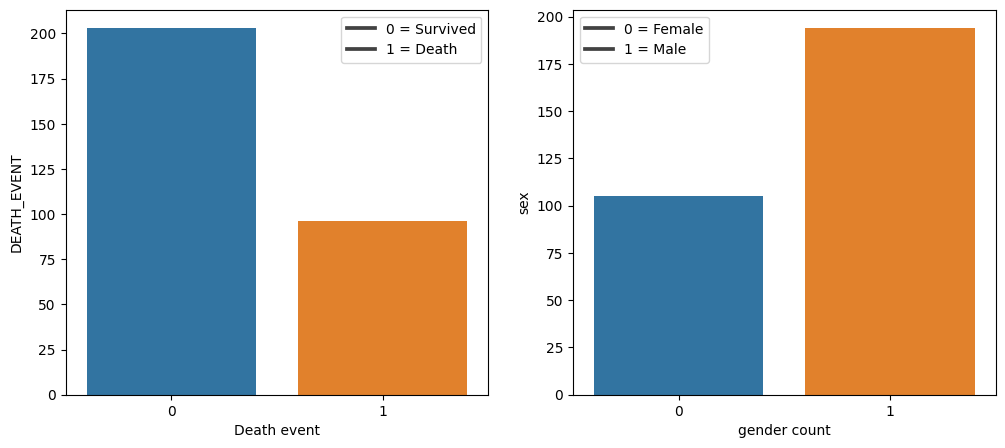

In [154]:
# melihat banyaknya value dari kolom death event
plt.subplots(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(data=df, x=df['DEATH_EVENT'].value_counts().index, y=df['DEATH_EVENT'].value_counts())
plt.legend(['0 = Survived', '1 = Death'], loc ='upper right')
plt.xlabel('Death event')

plt.subplot(1,2,2)
sns.barplot(data=df, x=df['sex'].unique(), y=df['sex'].value_counts(ascending=True))
plt.legend(['0 = Female', '1 = Male'], loc ='upper left')
plt.xlabel('gender count')

plt.show()

Dari data diatas dapat dilihat : 
- lebih banyak orang yang survived daripada orang yg meninggal dikarena gagal jantung.
- gender paling banyak adalah laki laki

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_9056\2324891647.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


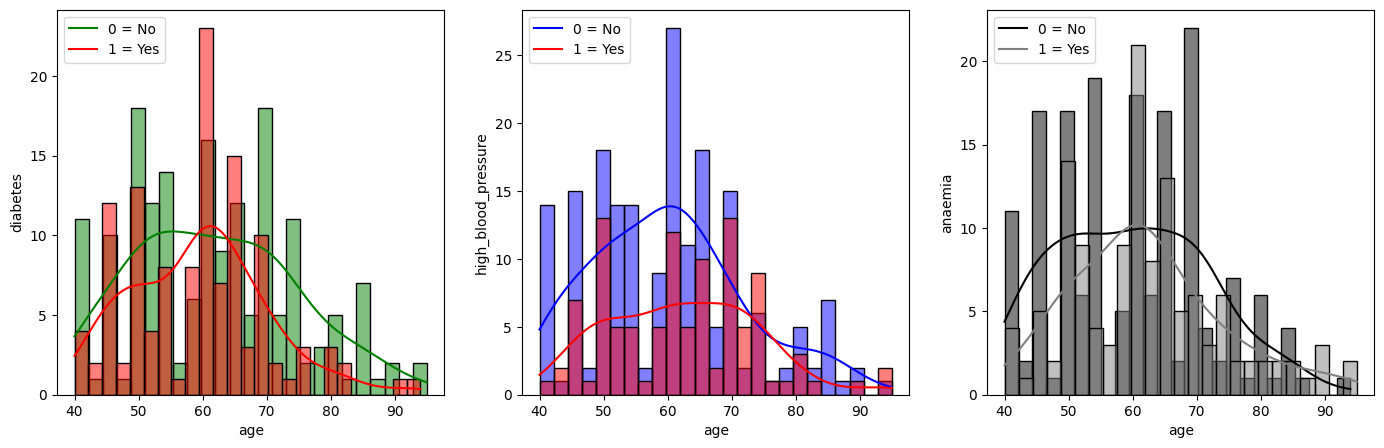

In [155]:
plt.subplots(figsize=(17,5))

class_0 = df.loc[df['diabetes'] == 0]['age']
class_1 = df.loc[df['diabetes'] == 1]['age']
plt.subplot(1,3,1)
sns.histplot(class_0, kde=True, bins=25, color='green')
sns.histplot(class_1, kde=True, bins=25, color='red')
plt.legend(['0 = No', '1 = Yes'], loc ='upper left')
plt.ylabel('diabetes')


value_0 = df.loc[df['high_blood_pressure'] == 0]['age']
value_1 = df.loc[df['high_blood_pressure'] == 1]['age']
plt.subplot(1,3,2)
sns.histplot(value_0, kde=True, bins=25, color='blue')
sns.histplot(value_1, kde=True, bins=25, color='red')
plt.legend(['0 = No', '1 = Yes'], loc ='upper left')
plt.ylabel('high_blood_pressure')


a0 = df.loc[df['anaemia'] == 0]['age']
a1 = df.loc[df['anaemia'] == 1]['age']
plt.subplot(1,3,3)
sns.histplot(a0, kde=True, bins=25, color='black')
sns.histplot(a1, kde=True, bins=25, color='grey')
plt.legend(['0 = No', '1 = Yes'], loc ='upper left')
plt.ylabel('anaemia')

plt.show()

Untuk penyakit diabetes dan tekanan darah tinggi dan anemia mengalami tren peningkatan dari umur 40 hingga 60 dan paling banyak berada di usia 60 


In [156]:
# Memeriksa unique values pada data
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

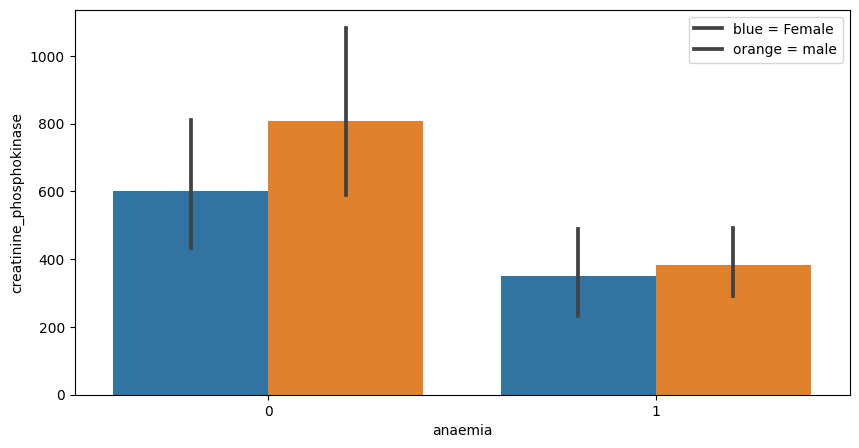

In [157]:
plt.figure(figsize=(10,5))
sns.barplot(x = "anaemia", y = "creatinine_phosphokinase", hue = "sex",
            data = df)
plt.legend(['blue = Female', 'orange = male'], loc ='upper right')



Orang yang terkena anemia rata rata memiliki creatinine phosphokinase <400 dan paling banyak dialami oleh pria

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_9056\1935562645.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 0, 'time')

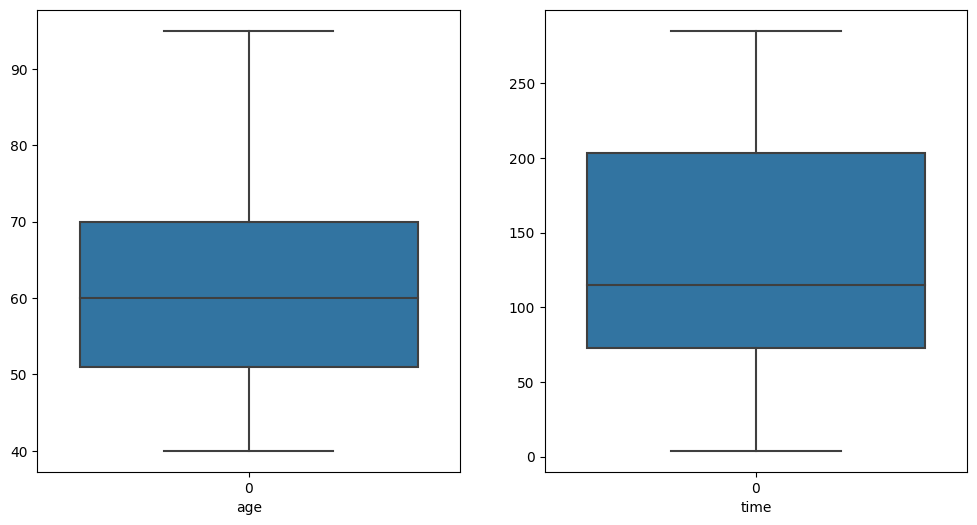

In [158]:
plt.subplots(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df['age'])
plt.xlabel('age')

plt.subplot(1,2,2)
sns.boxplot(df['time'])
plt.xlabel('time')

Dari distribusi datanya kolom age dan time tidak memiliki outlier

<AxesSubplot: >

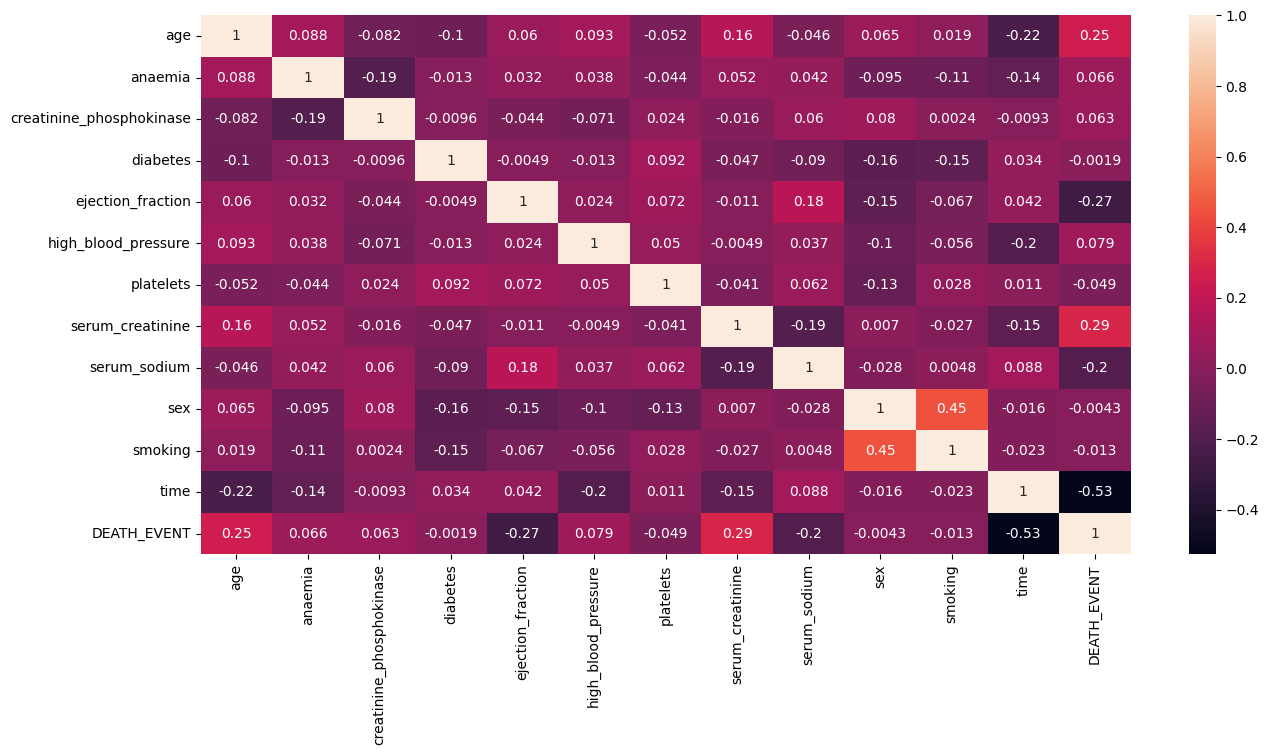

In [159]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

Kolom yang memiliki korelasi paling tinggi dengan target adalah :
- time
- serum_creatinine
- ejection_fraction
<br>

kolom yang memiliki korelasi terendah adalah: 
- sex
- diabetes
- platelets



# 5. Data preprocessing

In [160]:
# merubah nama kolom death event
df =df.rename(columns={'DEATH_EVENT': 'death_event'})

In [161]:
# Split data inference for model inference
data_inf = df.sample(20, random_state=12)
df_train_test = df.drop(data_inf.index)
df_train_test.reset_index(drop=True, inplace=True)
df_train_test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
2,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
3,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
4,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1


In [162]:
# Split X(feature) and y(Target)
X = df_train_test.drop(['death_event'], axis=1)
y = df_train_test['death_event']

In [163]:
# memisahkan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
print(f'Data train : {X_train.shape}')
print(f'Data test : {X_test.shape}')

Data train : (223, 12)
Data test : (56, 12)


## Feature Selection

In [164]:
numerical_feature = ['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets',  'serum_creatinine', 'serum_sodium', 'time']
categorical_feture = ['anaemia', 'diabetes', 'high_blood_pressure','smoking','sex']


In [165]:
X_train_feat_selection_num = X_train[numerical_feature]
X_train_feat_selection_cat = X_train[categorical_feture]

In [166]:
# Feature selection using ANOVA
from sklearn.feature_selection import SelectKBest , f_classif, chi2

anova = SelectKBest(score_func=f_classif, k=5)
anova.fit_transform(X_train_feat_selection_num, y_train)

anova_score = pd.DataFrame({'Anova_score':anova.scores_, 'P_value_anova': anova.pvalues_}, index=X_train_feat_selection_num.columns )
anova_score

,Anova_score,P_value_anova
age,17.773216,3.628775e-05
creatinine_phosphokinase,2.123932,1.464332e-01
ejection_fraction,9.791985,1.988975e-03
platelets,0.635216,4.263038e-01
serum_creatinine,27.221158,4.171461e-07
serum_sodium,10.553721,1.340241e-03
time,88.510495,6.793207e-18


In [167]:
chi = SelectKBest(score_func=chi2, k=2)
chi.fit_transform(X_train_feat_selection_cat, y_train)

score = pd.DataFrame({'Chi2_score':chi.scores_, 'P_value_chi': chi.pvalues_}, index= X_train_feat_selection_cat.columns )
score

,Chi2_score,P_value_chi
anaemia,0.133346,0.714987
diabetes,0.047220,0.827973
high_blood_pressure,1.528478,0.216341
smoking,0.281262,0.595875
sex,0.000929,0.975687


p value pada kolom anemia, diabetes, smoking dan sex lebih besar dari >0,05 sehingga perlu di drop kolom/feature tersebut

## Scalling 

In [168]:
# define scaller
normalized_scaller = MinMaxScaler()
standart_scaler = StandardScaler()

In [169]:
# check skewnes
df_train_test.skew()

age                         0.455394
anaemia                     0.283870
creatinine_phosphokinase    4.400241
diabetes                    0.358732
ejection_fraction           0.563426
high_blood_pressure         0.643194
platelets                   1.520530
serum_creatinine            4.756207
serum_sodium               -1.148463
sex                        -0.643194
smoking                     0.710935
time                        0.139254
death_event                 0.763181
dtype: float64

In [170]:
# Separate column
normal_column = ['age', 'time']
abnormal_column = ['creatinine_phosphokinase','platelets', 'ejection_fraction', 'serum_creatinine', 'serum_sodium' ]
dont_need_treatment = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

In [171]:
# make new variable with column separate
X_train_already_encoded = X_train[dont_need_treatment]
X_test_already_encoded= X_test[dont_need_treatment]
X_train_already_encoded.reset_index(drop=True, inplace=True)
X_test_already_encoded.reset_index(drop=True, inplace=True)

In [172]:
# make new variable with column separate

X_train_normal = X_train[normal_column]
X_test_normal = X_test[normal_column]

X_train_abnormal = X_train[abnormal_column]
X_test_abnormal = X_test[abnormal_column]


In [173]:
# Normalized scaller terhadap data yg distribusinya tidak normal 
normalized_scaller.fit_transform(X_train_abnormal)

X_train_scalled_abnormal = normalized_scaller.transform(X_train_abnormal)
X_test_scalled_abnormal = normalized_scaller.transform(X_test_abnormal)
X_train_scalled_abnormal

X_train_scalled_abnormal_df = pd.DataFrame(X_train_scalled_abnormal, columns=abnormal_column)
X_test_scalled_abnormal_df = pd.DataFrame(X_test_scalled_abnormal, columns=abnormal_column)

In [174]:
# Standart Scaller terhadap data yang distribusinya normal
standart_scaler.fit_transform(X_train_normal)
X_train_scalled_normal =standart_scaler.transform(X_train_normal)
X_test_scalled_normal =standart_scaler.transform(X_test_normal)

X_train_scalled_normal_df = pd.DataFrame(X_train_scalled_normal, columns=normal_column) 
X_test_scalled_normal_df = pd.DataFrame(X_test_scalled_normal, columns=normal_column) 

In [175]:
# Make data frame to see all column
X_train_final_df = pd.concat([X_train_scalled_normal_df, X_train_scalled_abnormal_df,X_train_already_encoded], axis=1)
X_test_final_df = pd.concat([X_test_scalled_normal_df, X_test_scalled_abnormal_df,X_test_already_encoded], axis=1)
X_train_final_df.head()

,age,time,creatinine_phosphokinase,platelets,ejection_fraction,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,smoking
0,-1.326094,1.913189,0.259888,0.869075,0.692308,0.033708,0.629630,0,1,0,0
1,-1.755004,0.747398,0.009952,0.243545,0.384615,0.033708,0.740741,1,0,0,0
2,-0.811402,1.477619,0.071319,0.237483,0.384615,0.044944,0.481481,0,1,0,0
3,-1.068748,0.824263,0.013779,0.265365,0.230769,0.123596,0.333333,1,1,1,0
4,-0.554057,1.080481,0.071319,0.289611,0.353846,0.146067,0.481481,0,1,0,0


In [176]:
# drop column after we see feature selection in sub bab feature selection
X_train_clean = X_train_final_df.drop(columns={'anaemia', 'diabetes', 'smoking'})
X_test_clean = X_test_final_df.drop(columns={'anaemia', 'diabetes', 'smoking'})
X_train_final = np.array(X_train_clean)
X_test_final = np.array(X_test_clean)
X_train_final.shape

(223, 8)

# 6. Model definition

In [177]:
# define randomforest and adaboost model
ada = AdaBoostClassifier(random_state=7)
rf = RandomForestClassifier(random_state=7)

# 7. Model Training

In [178]:
# train random forest and adaBoost model
rf.fit(X_train_final, y_train)
ada.fit(X_train_final,y_train)

AdaBoostClassifier(random_state=7)

# 8. Model Evaluation

In [179]:
fold = StratifiedKFold(n_splits=5)
# check cross val score

all_reports= {}
score1 = {
                'Train-accuracy':   cross_val_score(rf, X_train_final,y_train, cv=fold, scoring='accuracy').mean(),
                'Train-f1':   cross_val_score(rf, X_train_final,y_train, cv=fold, scoring='f1').mean(),
                'Traint-precision':   cross_val_score(rf, X_train_final,y_train, cv=fold, scoring='precision').mean(),
                'Train-recall':   cross_val_score(rf, X_train_final,y_train, cv=fold, scoring='recall').mean(),
                'Test-accuracy':   cross_val_score(rf, X_test_final,y_test, cv=fold, scoring='accuracy').mean(),
                'Test-f1':   cross_val_score(rf, X_test_final,y_test, cv=fold, scoring='f1').mean(),
                'Test-precision':   cross_val_score(rf, X_test_final,y_test, cv=fold, scoring='precision').mean(),
                'Test-recall':   cross_val_score(rf, X_test_final,y_test, cv=fold, scoring='recall').mean(),
}
all_reports['Random Forest-default'] = score1
pd.DataFrame(all_reports)

,Random Forest-default
Test-accuracy,0.825758
Test-f1,0.737143
Test-precision,0.766667
Test-recall,0.733333
Train-accuracy,0.855960
Train-f1,0.766675
Train-recall,0.735238
Traint-precision,0.809524


In [180]:
score1 = {
                'Train-accuracy':   cross_val_score(ada, X_train_final,y_train, cv=fold, scoring='accuracy').mean(),
                'Train-f1':   cross_val_score(ada, X_train_final,y_train, cv=fold, scoring='f1').mean(),
                'Traint-precision':   cross_val_score(ada, X_train_final,y_train, cv=fold, scoring='precision').mean(),
                'Train-recall':   cross_val_score(ada, X_train_final,y_train, cv=fold, scoring='recall').mean(),
                'Test-accuracy':   cross_val_score(ada, X_test_final,y_test, cv=fold, scoring='accuracy').mean(),
                'Test-f1':   cross_val_score(ada, X_test_final,y_test, cv=fold, scoring='f1').mean(),
                'Test-precision':   cross_val_score(ada, X_test_final,y_test, cv=fold, scoring='precision').mean(),
                'Test-recall':   cross_val_score(ada, X_test_final,y_test, cv=fold, scoring='recall').mean(),
}
all_reports['Ada-Boost-default'] = score1
pd.DataFrame(all_reports)

,Random Forest-default,Ada-Boost-default
Train-accuracy,0.855960,0.789192
Train-f1,0.766675,0.663360
Traint-precision,0.809524,0.680249
Train-recall,0.735238,0.654286
Test-accuracy,0.825758,0.681818
Test-f1,0.737143,0.561429
Test-precision,0.766667,0.553333
Test-recall,0.733333,0.616667


Random forest menjadi model yang lebih baik dibanding adaboost

## Hyperparamter tuning

In [181]:
# define parameter in random forest and adaboost
parameter_rf = {
    'n_estimators' : [200,250,300,500],
    'max_depth': [10,15,17],
    'min_samples_leaf' : [2,3,4],
}

parameter_ada = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.5,0.75,1 ],
    'algorithm': ['SAMME', 'SAMME.R']    
}


In [182]:
# hyperparameter tuning random forest

rf_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=20),
                         param_grid=parameter_rf,
                         cv=fold,
                         n_jobs=-1,
                         verbose=2, 
                         refit='f1_w',
                        )

rf_grid.fit(X_train_final,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 17],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [200, 250, 300, 500]},
             refit='f1_w', verbose=2)

In [183]:
# hyperparameter tuning adaboost

ada_grid = GridSearchCV(estimator=AdaBoostClassifier(base_estimator=None,random_state=20),
                         param_grid=parameter_ada,
                         cv=fold,
                         n_jobs=-1,
                         verbose=2, 
                         scoring='f1',
                        )
ada_grid.fit(X_train_final,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(random_state=20), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.5, 0.75, 1],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [184]:
# choose best parameter
rf_grid.best_params_

rf_grid_best = rf_grid.best_estimator_
rf_grid_best

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=250,
                       random_state=20)

In [185]:
# choose best parameter
ada_grid.best_params_
ada_grid_best = ada_grid.best_estimator_
ada_grid_best

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=100,
                   random_state=20)

In [186]:
score1 = {
                'Train-accuracy':   cross_val_score(rf_grid_best, X_train_final,y_train, cv=fold, scoring='accuracy').mean(),
                'Train-f1':   cross_val_score(rf_grid_best, X_train_final,y_train, cv=fold, scoring='f1').mean(),
                'Traint-precision':   cross_val_score(rf_grid_best, X_train_final,y_train, cv=fold, scoring='precision').mean(),
                'Train-recall':   cross_val_score(rf_grid_best, X_train_final,y_train, cv=fold, scoring='recall').mean(),
                'Test-accuracy':   cross_val_score(rf_grid_best, X_test_final,y_test, cv=fold, scoring='accuracy').mean(),
                'Test-f1':   cross_val_score(rf_grid_best, X_test_final,y_test, cv=fold, scoring='f1').mean(),
                'Test-precision':   cross_val_score(rf_grid_best, X_test_final,y_test, cv=fold, scoring='precision').mean(),
                'Test-recall':   cross_val_score(rf_grid_best, X_test_final,y_test, cv=fold, scoring='recall').mean(),
}
all_reports['Random-forest-tuning'] = score1
pd.DataFrame(all_reports)

,Random Forest-default,Ada-Boost-default,Random-forest-tuning
Train-accuracy,0.855960,0.789192,0.873838
Train-f1,0.766675,0.663360,0.787539
Traint-precision,0.809524,0.680249,0.856970
Train-recall,0.735238,0.654286,0.734286
Test-accuracy,0.825758,0.681818,0.824242
Test-f1,0.737143,0.561429,0.698095
Test-precision,0.766667,0.553333,0.800000
Test-recall,0.733333,0.616667,0.633333


In [187]:
score1 = {
                'Train-accuracy':   cross_val_score(ada_grid_best, X_train_final,y_train, cv=fold, scoring='accuracy').mean(),
                'Train-f1':   cross_val_score(ada_grid_best, X_train_final,y_train, cv=fold, scoring='f1').mean(),
                'Traint-precision':   cross_val_score(ada_grid_best, X_train_final,y_train, cv=fold, scoring='precision').mean(),
                'Train-recall':   cross_val_score(ada_grid_best, X_train_final,y_train, cv=fold, scoring='recall').mean(),
                'Test-accuracy':   cross_val_score(ada_grid_best, X_test_final,y_test, cv=fold, scoring='accuracy').mean(),
                'Test-f1':   cross_val_score(ada_grid_best, X_test_final,y_test, cv=fold, scoring='f1').mean(),
                'Test-precision':   cross_val_score(ada_grid_best, X_test_final,y_test, cv=fold, scoring='precision').mean(),
                'Test-recall':   cross_val_score(ada_grid_best, X_test_final,y_test, cv=fold, scoring='recall').mean(),
}
all_reports['adaboost-tuning'] = score1
pd.DataFrame(all_reports)

,Random Forest-default,Ada-Boost-default,Random-forest-tuning,adaboost-tuning
Train-accuracy,0.855960,0.789192,0.873838,0.842929
Train-f1,0.766675,0.663360,0.787539,0.744513
Traint-precision,0.809524,0.680249,0.856970,0.792121
Train-recall,0.735238,0.654286,0.734286,0.708571
Test-accuracy,0.825758,0.681818,0.824242,0.718182
Test-f1,0.737143,0.561429,0.698095,0.604805
Test-precision,0.766667,0.553333,0.800000,0.635714
Test-recall,0.733333,0.616667,0.633333,0.616667


tuning pada adaboost sangat baik sedangkan pada random forest test data mengalami penurunan pada metriks recall dan f1score

# 9. Model Inference

In [188]:
# check data inference
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
222,58.0,0,132,1,38,1,253000.00,1.00,139,1,0,230,0
135,68.0,1,646,0,25,0,305000.00,2.10,130,1,0,108,0
67,60.0,1,2281,1,40,0,283000.00,1.00,141,0,0,187,0
159,75.0,1,582,0,30,0,225000.00,1.83,134,1,0,113,1
211,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
77,82.0,1,855,1,50,1,321000.00,1.00,145,0,0,30,1
1,46.0,0,168,1,17,1,271000.00,2.10,124,0,0,100,1
145,58.0,1,57,0,25,0,189000.00,1.30,132,1,1,205,0
189,80.0,0,582,1,35,0,350000.00,2.10,134,1,0,174,0
169,42.0,0,64,0,30,0,215000.00,3.80,128,1,1,250,0


In [189]:
# menghapus kolom yang tidak terpakai seperti pada data train dan test data
data_inf =data_inf.drop(columns={'anaemia', 'diabetes', 'smoking' })

In [190]:
# menentukan feature dan terget pada data inference
X_inf = data_inf.drop(columns={'death_event'})
y_inf = data_inf['death_event']
y_inf.reset_index(drop=True, inplace=True)

In [191]:
# separate all the column
normal_column = ['age', 'time']
abnormal_column = ['creatinine_phosphokinase','platelets', 'ejection_fraction', 'serum_creatinine', 'serum_sodium' ]
dont_need_treatment = ['high_blood_pressure']

In [192]:
# define column in diferent variable
X_inf_normal = X_inf[normal_column]
X_inf_abnormal = X_inf[abnormal_column]
X_inf_dont_need_treatment = X_inf[dont_need_treatment]

In [193]:
# normalized and standar scalling

X_inf1 = standart_scaler.transform(X_inf_normal)
X_inf2 = normalized_scaller.transform(X_inf_abnormal)

In [194]:
# merge all the variable after scalling

X_inf_final = np.concatenate([X_inf1,X_inf2,X_inf_dont_need_treatment], axis=1)

In [195]:
# predict inference data with best model after hypertuning

rf_pred_inf  = rf_grid_best.predict(X_inf_final)
ada_pred_inf = ada_grid_best.predict(X_inf_final)


In [202]:
y_inf_df = pd.DataFrame(y_inf)


In [204]:

rf_pred_inf_df = pd.DataFrame(rf_pred_inf, columns=['predict using randomforest(tuning)'])
ada_pred_inf_df = pd.DataFrame(ada_pred_inf, columns=['predict using Adaboost(tuning)'])
pd.concat([y_inf_df, rf_pred_inf_df, ada_pred_inf_df], axis=1)

,death_event,predict using randomforest(tuning),predict using Adaboost(tuning)
0,0,0,0
1,0,1,1
2,0,0,0
3,1,1,1
4,1,1,1
5,1,1,1
6,1,1,1
7,0,0,0
8,0,1,1
9,0,1,0


In [ ]:
print(classification_report(rf_pred_inf,y_inf))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.60      0.75        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80      0.79        20



In [ ]:
print(classification_report(ada_pred_inf,y_inf))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.67      0.80         9

    accuracy                           0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20



Pada hasil klasifikasi report RandomForest dapat kita lihat bahwa akurasi dari model random forest adalha 80% dan AdaBoost adalah 85%
dan precision rata-rata adalah 86% dan recall rata-rata adalah 80%<br>
Sedangkan pada Adaboost memiliki nilai yang lebih tinggi, baik pada akurasi, presisi, recall dengan masing masing nilai adalah 85%, 89%, dan 83%


# 10. Kesimpulan

Dilihat dari korelasi setiap feature prediksi kematian akibat gagal jantung pada dasarnya disebabkan oleh tiga hal: waktu, cerum_ceratinine, dan ejection fraction memegang.<br>
Sedangkan korelasi yang terendah adalah jenis kelamin, diabetes, dan platelets berada di atas p-value 0,05, yang tidak memliki pengaruh kejadian kematian
<br>

Prediksi tergantung pada algoritma yang digunakan, dalam hal ini ternyata menggunakan teknik Bagging, seperti Randomforest menunjukkan hasil yang lebih baik tanpa penyetelan hyperparameter.<br> Namun, Pengklasifikasi AdaBoost juga memiliki nilai metriks yang baik saat dilakukan dengan penyetelan hyperparameter, meskipun lebih baik juga saat menggunakan algoritma random forest

Pada saat melakukan pengetesan dengan model inference dengan model yang sudah dilakukan penyetelan hyper parameter nilai akurasi pada random forest menunjukkan penurunan sebesar 7% hal ini disebabkan karena randomforest sangat baik jika melakukan prediksi dengan size data yang besar, sedangkan pada data inference hanya memiliki 20 data. dan pada Adaboost hasil metriks sesuai dengan traning model yang dilakukan pada train data dan lebih baik dari random forest

Pada classification report terdapat 4 kesalahan klasisfikasi pada random forest dan 3 kesalahan pada adaboost




# Conceptual Problem
1. Apakah yang dimaksud dengan Bagging?

2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?

# Answer Conceptual Problem
1. Bagging adalah cara untuk menggabungkan algoritma machine learning dari jenis yang sama, yang bertujuan untuk meningkatkan akurasi dan stabilitas dari algoritma machine learing 

2. Random Forest Classifier adalah teknik bagging yang bertujuan untuk menaikkan akurasi dan mengurangi varians.<br>
AdaBoost adalah teknik boosting yang bertujuan untuk menaikkan akurasi dan mengurangi bias, namun tidak terfokus pada bias

Random forest adalah algoritma ensemble learning yang dibangun dari pohon keputusan. Algoritma ini membuat beberapa pohon keputusan menggunakan data bootstrap dan secara acak memilih subset variabel di setiap pohon keputusan.<br>
Pada Adaboost juga menggunakan beberapa pohon keputusan untuk memperoleh data prediksi. Walaupun memiliki kesamaan dengan random forest, ternyata terdapat perbedaan pada algoritma AdaBoost, yakni Adaboost membangun stumps forest. Stumps adalah pohon yang hanya terbuat dari satu cabang dan dua daun. Kedua, stumps yang dibangun tidak memiliki bobot yang sama pada prediksi akhir. Artinya, stumps yang memiliki error besar memiliki pengaruh yang kecil saat pengambilan keputusan.
